### Determing Which Color Space performs better.

In this notebook, I will determine which color space performs better. All other feature extraction parameters are unchanged.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import time
from sklearn.svm import LinearSVC
import numpy as np

from project_modules.feature_extraction import *
from project_modules.model import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Parameters for feature extraction
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [480, None] # Min and max in y to search in slide_window()

cars, notcars = get_train_data()

In [3]:
color_spaces = ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']
results=[]
color_space_name = []

for color_space in color_spaces:
    t=time.time()
    print('Extracting features for {}'.format(color_space))
    car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    notcar_features = extract_features(notcars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to extract features...\nStarting model training\n')
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

    t=time.time()
    svc_scores = svc_model(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    msg = '{}: {:.4f} ({:.4f})\n'.format(color_space, svc_scores.mean(), svc_scores.std())
    print(msg)
    print('=====\n')
    results.append(svc_scores)
    color_space_name.append(color_space)



Extracting features for RGB
85.87 Seconds to extract features...
Starting model training

101.0 Seconds to train SVC...
RGB: 0.9550 (0.0025)

=====

Extracting features for HSV
88.76 Seconds to extract features...
Starting model training

77.83 Seconds to train SVC...
HSV: 0.9775 (0.0020)

=====

Extracting features for LUV
91.3 Seconds to extract features...
Starting model training

71.19 Seconds to train SVC...
LUV: 0.9811 (0.0026)

=====

Extracting features for HLS
92.99 Seconds to extract features...
Starting model training

80.66 Seconds to train SVC...
HLS: 0.9761 (0.0018)

=====

Extracting features for YUV
89.09 Seconds to extract features...
Starting model training

75.4 Seconds to train SVC...
YUV: 0.9780 (0.0017)

=====

Extracting features for YCrCb
88.41 Seconds to extract features...
Starting model training

71.04 Seconds to train SVC...
YCrCb: 0.9795 (0.0017)

=====



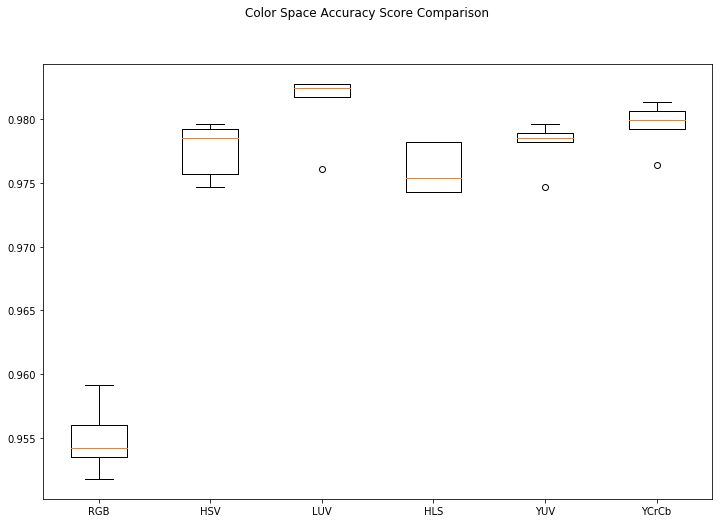

In [4]:
# Compare Color Spaces
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
fig.suptitle('Color Space Accuracy Score Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(color_space_name)
plt.show()

Based on these results, I will investigate the LUV color space further.